## Laboratorio 8: dataset diabetes

<img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" width="300">

**Elaborado por:** Catalina Restrepo Salgado

Fundamentos de Analítica

Semestre 2024-1S

Por medio de la presente actividad, se espera entrenar un modelo de regresión que permita predecir el progreso de la diabetes en un paciente, a partir de las características proporcionadas en el dataset que se muestra a continuación. En primer lugar, es preciso importar las librerías necesarias para realziar este ejercicio.

In [7]:
# Importación de librerías necesarias
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from scipy import stats
import numpy as np

A continuación, se leen los datos de entrenamiento y prueba proporcionados en dos archivos separados.

In [8]:
# Lectura de los datos de entrenamiento y prueba
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

Observando el dataset de entrenamiento, se identifican las 10 variables con las que se espera entrenar el modelo de regresión y la variable `target`, que es el valor de predicción para este caso.

In [9]:
# Visualización del dataset de entrenamiento
train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.019913,0.050680,0.104809,0.070072,-0.035968,-0.026679,-0.024993,-0.002592,0.003709,0.040343,321.0
1,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207,215.0
2,0.038076,0.050680,0.008883,0.042529,-0.042848,-0.021042,-0.039719,-0.002592,-0.018114,0.007207,127.0
3,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0
4,-0.023677,-0.044642,0.045529,0.090729,-0.018080,-0.035447,0.070730,-0.039493,-0.034522,-0.009362,175.0


El conjunto de datos tiene un total de 309 registros, correspondientes a un grupo de pacientes que ya tienen un valor asignado para el progreso de la diabetes.

In [10]:
# Dimensiones del dataset de entrenamiento
train.shape

(309, 11)

Como paso siguiente, se hace un diagrama de cajas para cada una de las variables del conjunto de datos, esperando identificar su comportamiento.

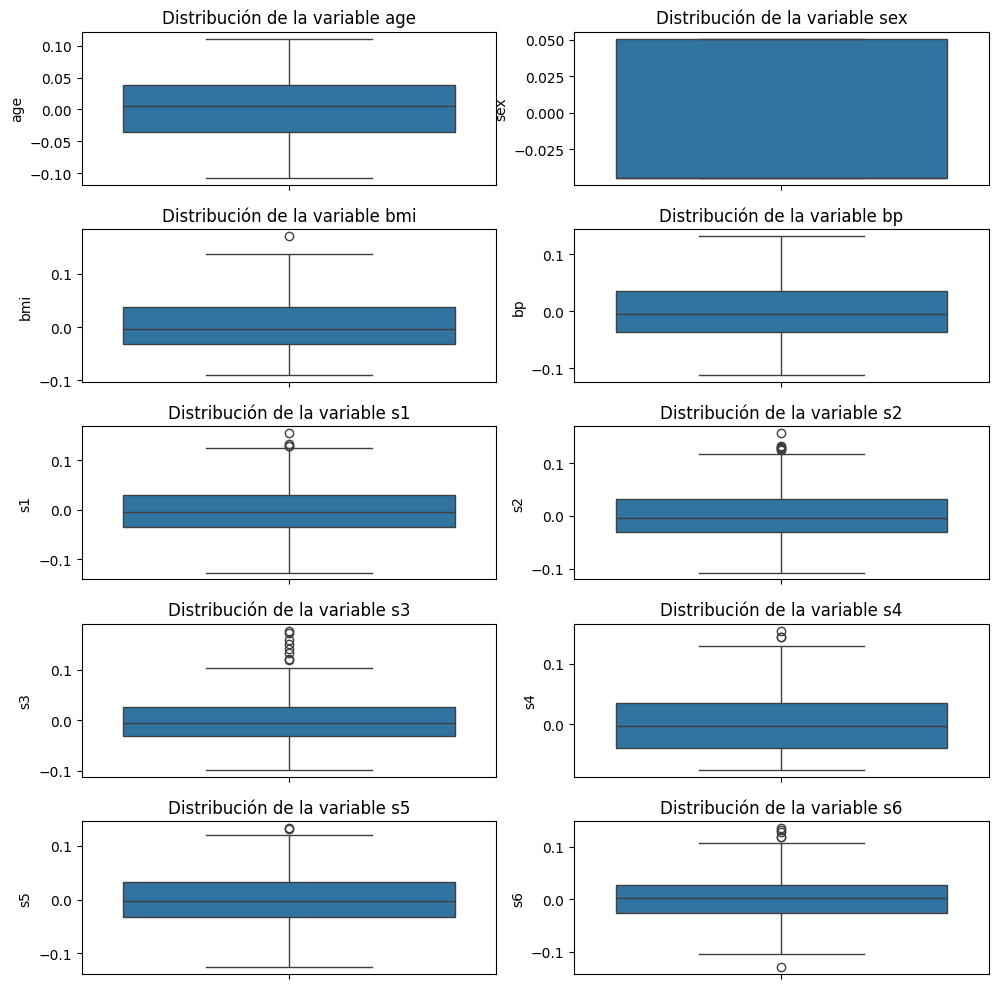

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, column in enumerate(train.columns.drop('target')):
    sns.boxplot(data=train[column], ax=axes[i])
    axes[i].set_title(f"Distribución de la variable {column}")

# Eliminar los subplots vacíos (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Considerando el comportamiento de las variables visto anteriormente, se procede a eliminar los datos atípicos siguiendo el criterio del z-score.

In [13]:
# Eliminación de datos atípicos
train = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

In [14]:
# Tamaño del dataset de entrenamiento después de eliminar los datos atípicos
train.shape

(299, 11)

Ahora bien, teniendo en cuenta que en el enunciado no se especifica la posibilidad de eliminar variables en el dataset, este paso no se realizará ni se calculará la matriz de correlación para este caso. Para continuar con la realización de la actividad, se dividen los datasets de entrenamiento y prueba, separando las variables del valor de predicción.

In [15]:
X_train = train.drop(columns=['target'], axis=1)
y_train = train['target']

X_test = test.drop(columns=['target'], axis=1)
y_test = test['target']

Una vez separadas las variables, se llevará a cabo el entrenamiento del modelo, que para este caso será una Regresión Lineal: este modelo se considera adecuado, dadas las características del problema.

In [16]:
# Entrenamiento del modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Una vez entrenado el modelo, se evaluará a través de una serie de métricas que miden su desempeño, tanto en el conjunto de datos de entrenamiento como en el de prueba.

In [17]:
# Métricas para los datos de entrenamiento
y_pred = model_lr.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
print(f'Error cuadrático medio: {mse}')

mae = mean_absolute_error(y_train, y_pred)
print(f'Error absoluto medio: {mae}')

r2 = r2_score(y_train, y_pred)
print(f'R2: {r2}')

Error cuadrático medio: 2962.4581203263274
Error absoluto medio: 44.185861209460136
R2: 0.46245152425754243


Luego, se realiza una predicción para el dataset de prueba, a fin de observar si se obtuvieron resultados favorables.

In [18]:
y_pred = model_lr.predict(X_test)

In [19]:
# Métricas para los datos de prueba
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

Error cuadrático medio: 2866.448216978963
Error absoluto medio: 43.15171712754518
R2: 0.567480855598576


Este conjunto de resultados se considera satisfactorio para efectos prácticos del ejercicio realizado, por lo tanto, el modelo puede ser guardado en disco para permitir su uso y evaluación posterior.

In [20]:
# Guardar el modelo
with open('model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)